# Author: NIMISHA SUNNY

# TSF GRIP TASK :1

### Prediction using Supervised ML

(Level - Beginner)

Predict the percentage of marks of an student based on the number of
study hours

Dataset:  http://bit.ly/w-data

# Linear Regression 

Linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable). 

1) Import the packages and classes you need.

2) Provide data to work with and eventually do appropriate transformations.

3) Create a regression model and fit it with existing data.

4) Check the results of model fitting to know whether the model is satisfactory.

5) Apply the model for predictions.

### Import the Library packages

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Data Exploration

In [2]:
url = "http://bit.ly/w-data" # Reading the dataset from remote link
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10) #Disply the first 10 rows of dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
print("The size of dataset :", df.size) # it gives the entire size of dataset

The size of dataset : 50


In [6]:
 print("  Dimension of dataset :  ",df.shape)

  Dimension of dataset :   (25, 2)


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualisation

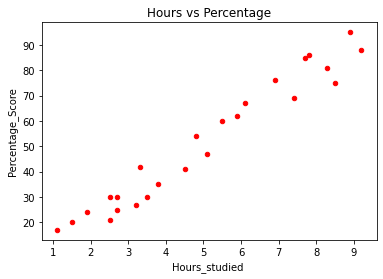

In [8]:
df.plot(x='Hours',y='Scores',kind= 'scatter',color='red' )
plt.title('Hours vs Percentage')
plt.xlabel('Hours_studied ')
plt.ylabel('Percentage_Score')
plt.show()


### Prepare the model

In [9]:
X=df.iloc[:,:-1] # Feature variable
y=df.iloc[:,1]  # Dependent variable  

### Splitting data into train and test set

In [10]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

#SHAPE OF TRAINING DATA:
print(X_train.shape)
print(y_train.shape)

(20, 1)
(20,)


### Model training

In [11]:
model= LinearRegression().fit(X_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Best Fit line

In [12]:
model.coef_

array([9.91065648])

In [13]:
model.intercept_

2.0181600414346974

In [14]:
Best_line=model.coef_*X +model.intercept_
Best_line

,Hours
0,26.794801
1,52.562508
2,33.732261
3,86.258740
4,36.705458
5,16.884145
6,93.196200
7,56.526771
8,84.276609
9,28.776933


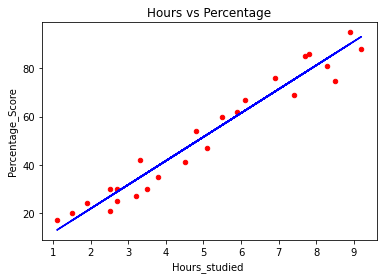

In [15]:
df.plot(x='Hours',y='Scores',kind= 'scatter',color='red' )
plt.plot(X,Best_line,color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours_studied ')
plt.ylabel('Percentage_Score')
plt.show()


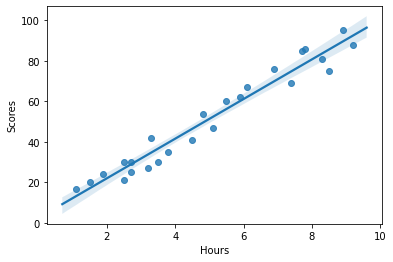

In [16]:
import seaborn as sns
sns.regplot(data=df, x="Hours", y="Scores")# seaborn visualisation

### Predict the model

In [17]:
y_pred=model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
#ACTUAL Vs PREDICTED
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


What will be predicted score if a student studies for 9.25 hrs/ day?

In [19]:
hours=9.25
own_pred=model.predict([[hours]])
print("No. of hours = {} hrs".format(hours))
print("Marks Scored = {}".format(own_pred[0]))

No. of hours = 9.25 hrs
Marks Scored = 93.69173248737535


### Model Evaluation

In [20]:
scoee=model.score(X,y) #Accuracy

scoee
  

0.9526947647057274

Calculate the accuracy of the model for both training and test data set

In [21]:
r=model.score(X_train,y_train)# Training Accuacy 
r

0.9515510725211553

In [22]:
d=model.score(X_test,y_test)# Test Accuracy
d

0.9454906892105355

### Evaluation Metrics

In [25]:
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 4.183859899002975
Mean squared error: 21.598769307217406
Root mean squared error: 4.647447612100367
